# Image Filtering

The main objectives of this module are:

* Implement point filtering with look-up tables.
* Implement region filtering with kernel convolution, morphological operations and edge detection.
* Understand spatial frequency information with the Fourier transform.

## 1. Look-up tables

Look-up tables are a very useful tool to perform simple pixel-level filtering of an image.

Numpy arrays indexing ([see reference here](http://docs.scipy.org/doc/numpy/user/basics.indexing.html)) is a very powerful tool, but can be a bit counter-intuitive at first. We will use it to quickly create and use look-up tables to transform an image.

Look at the short example below. 

We construct an image with 4 possible values for each pixel (-> $I(x,y) \in \{0,1,2,3\}$). We then build the following LUT:

|Input value|Output value|
|--|--|
|0|2|
|1|3|
|2|1|
|3|0|

And we apply it on the image.

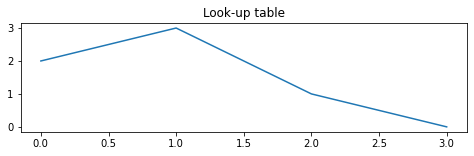

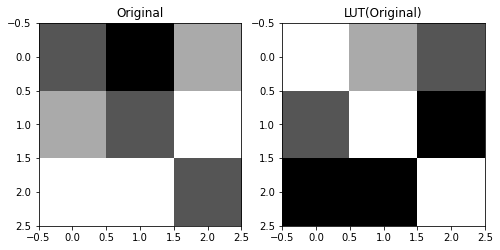

In [1]:
from skimage.io import imread,imsave,imshow
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

# Let's create a 3x3 "image" with 4 possible pixel values (in [0,3])
im = np.array([[1,0,2],[2,1,3],[3,3,1]])

# look-up table is a vector of size 4 mapping the new value for the pixels of m
lut = np.array([2,3,1,0]) # maps 0 -> 2, 1 -> 3, 2 -> 1, 3 -> 0

plt.figure(figsize=(8,2))
plt.plot(lut)
plt.title('Look-up table')
plt.show()

# we can use numpy vector indexing to apply the look-up table:
new_im = lut[im] # This will create a new array with the same size as m

plt.figure(figsize=(8,4))
plt.subplot(1,2,1) #supblot is useful to display images side-by-side
plt.imshow(im, cmap=cm.gray)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(new_im, cmap=cm.gray)
plt.title('LUT(Original)')
plt.show()

**Starting from this example, create the following LUTs** and apply them to the "walking.jpg" image:
1. For inverting an image (so that $0 \rightarrow 255$, $255 \rightarrow 0$)
1. To keep only graylevel such that $g \ge t$, setting all other values to 0.
1. To reduce the number of gray levels from 256 to 8 (so that $255 \rightarrow 7$, $0 \rightarrow 0$).
1. To "stretch" the histogram so that, given a **minimum value** $T_{min}$ and a **maximum value** $T_{max}$, we have :
    * If $I(x,y) < T_{min}$, the new value is set to 0
    * If $I(x,y) > T_{max}$, the new value is set to 255
    * Values between $T_{min}$ and $T_{max}$ are stretched to cover the entire histogram.
1. to perform an **equalization** of the cameraman image (so that the histogram becomes "as flat as possible")

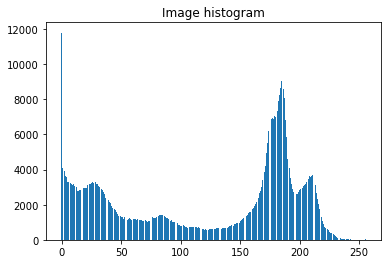

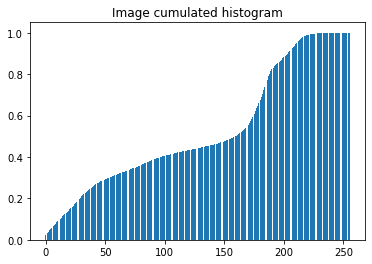

In [8]:
im = imread('walking.jpg')

def image_hist(im):
    h = [(im == v).sum() for v in range(0, 256)]
    # print(h,len(h))
    plt.figure()
    plt.bar(range(0, 256), h)
    plt.title('Image histogram')
    plt.show()

def image_cumulhist(im):
    h = [(im == v).sum() for v in range(0, 256)]
    norm_h = np.array(h)/np.array(h).sum()
    cumul_h = np.zeros(256)
    for i in range(256):
        cumul_h[i] = norm_h[i] + cumul_h[i-1]
    # print(cumul_h)
    plt.figure()
    plt.bar(range(0, 256), cumul_h)
    plt.title('Image cumulated histogram')
    plt.show()


image_hist(im)


image_cumulhist(im)


(799, 640) uint8


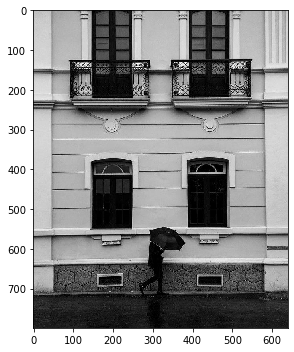

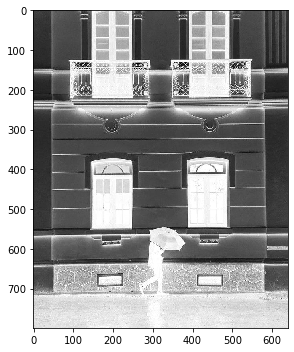

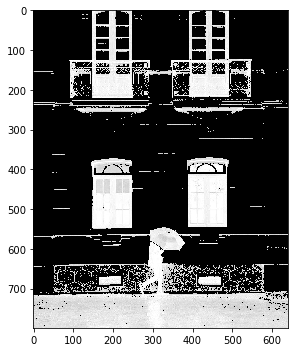

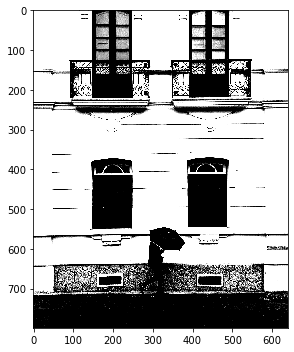

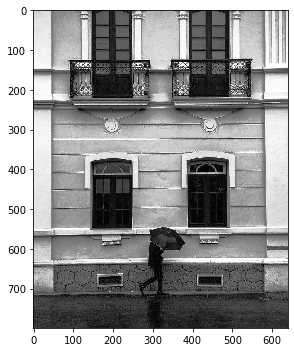

In [3]:
from skimage.io import imread,imshow,imsave

im = imread('walking.jpg')
print(im.shape, im.dtype)
plt.figure(figsize=(5,5))
imshow(im)
plt.show()

## -- Your code here -- ##
def invert(im):
    invert_lut = np.arange(255,-1,-1)
    inverted_im = invert_lut[im].astype('uint8')
    plt.figure(figsize=(5,5))
    imshow(inverted_im)
    plt.show()

invert(im)

def threshold(im, t):
    threshold_lut = np.arange(255,-1,-1)
    threshold_lut[threshold_lut<t] = 0
    thresholded_im = threshold_lut[im].astype('uint8')
    plt.figure(figsize=(5,5))
    imshow(thresholded_im)
    plt.show()

threshold(im,200)

def gray_reduction(im):
    bin = (im.max()-im.min()+1)/8
    reduction_lut = np.array(np.repeat(range(8), bin))
    reduced_im = reduction_lut[im].astype('uint8')
    plt.figure(figsize=(5,5))
    imshow(reduced_im)
    #image_hist(im)
    #image_hist(reduced_im)
    plt.show()

#gray_reduction(im)

def stretch(im, Tmin, Tmax):
    stretch_lut = np.array([0 if i < Tmin else 255 if i > Tmax else int(255*(i - Tmin) / (Tmax - Tmin)) for i in range(256)])
    stretched_im = stretch_lut[im].astype('uint8')
    plt.figure(figsize=(5,5))
    imshow(stretched_im)
    #image_hist(im)
    #image_hist(stretched_im)
    plt.show()

stretch(im,50,100)

def equalize(im):
    h = [(im == v).sum() for v in range(0, 256)]
    cumul_h = np.zeros(256)
    for i in range(256):
        cumul_h[i] = h[i] + cumul_h[i-1]
    cumul_h = cumul_h*255/cumul_h[-1]
    equalized_image = cumul_h[im].astype('uint8')
    plt.figure(figsize=(5,5))
    imshow(equalized_image)
    #image_cumulhist(equalized_image)
    plt.show()

equalize(im)

**Need more help? You can check the following videos:**

* [Look-Up Tables](https://www.youtube.com/watch?v=PHiiKoSsVac&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=13)
* [Auto-levels](https://www.youtube.com/watch?v=DLN4jfBJakQ&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=14)
* [Equalization](https://www.youtube.com/watch?v=C44WuMUudik&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=15)

## 2. Kernel convolution

Kernal convolution allows us to filter an image based on the values of a neighborhood.

Write a program that applies a 3x3 kernel convolution on an image. Use it on the "walking" image to perform a mean filter.

(799, 640)
Kernel:
 [[ 1.  0. -1.]
 [ 1.  0. -1.]
 [ 1.  0. -1.]]


c:\Users\victo\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


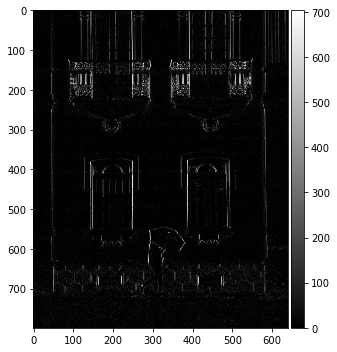

In [4]:
def conv(im, kernel):
    im_out = np.zeros(im.shape)

    for y in range(kernel.shape[0]//2, im.shape[0]-kernel.shape[0]//2):
        for x in range(kernel.shape[1]//2, im.shape[1]-kernel.shape[1]//2):
            im_out[y, x] = (im[y-kernel.shape[0]//2:y+kernel.shape[0]//2+kernel.shape[0]%2,x-kernel.shape[1]//2:x+kernel.shape[1]//2+kernel.shape[1]%2]*kernel).sum()
    #print('Convolution matrix:'+'\n',im_out)
    return im_out

im = imread('walking.jpg')
print(im.shape)

## -- Your code here -- ##
kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]).astype('float')
print('Kernel:'+'\n', kernel)

plt.figure(figsize=(5,5))
convoluted_im = conv(im, kernel)
imshow(np.abs(convoluted_im), cmap=plt.cm.gray)
plt.show()

Using the [median filter](https://scikit-image.org/docs/stable/api/skimage.filters.rank.html#skimage.filters.rank.median) and the [mean filter](https://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) from scikit-image, compare the behaviour of the two filters with neighborhood of increasing sizes on the "noisy" astronaut image:

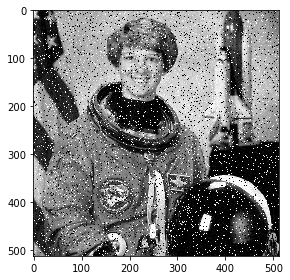

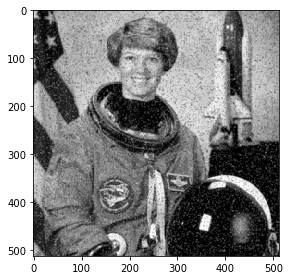

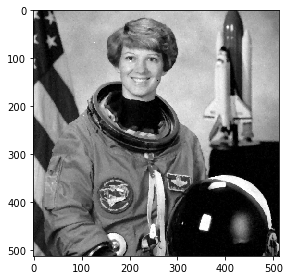

In [5]:
from skimage.filters.rank import mean, median


im = imread('astronaut_noisy.jpg')
imshow(im)

## -- Your code here -- ##
k_size = 3

plt.figure()
mean_convoluted_im = mean(im, np.ones((k_size, k_size)))
median_convoluted_im = median(im, np.ones((k_size, k_size)))
imshow(mean_convoluted_im, cmap=plt.cm.gray)
plt.show()

plt.figure()
imshow(median_convoluted_im, cmap=plt.cm.gray)
plt.show()

**Need more help? You can check the following videos:**

* [Kernel convolution](https://www.youtube.com/watch?v=FaTvGWPnLng&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=16)
* [Mean and Median filters](https://www.youtube.com/watch?v=GLTuF3lwDLs&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=17)

## 3. 2D Fourier transform

The 2D Fourier transform allows us to get a representation of the spatial frequencies present in an image. A very powerful way of filtering images is to modify those frequencies directly by modifying the "Fourier image", and to use the inverse transform to get the pixel values of the filtered image.

Let's illustrate that with a fake example. We start with a completely random signal and compute the Fourier transform. Note that the Fourier image is complex, so we use its amplitude. As the range of amplitudes is so high that we don't see much in the resulting image, we display the log of the amplitude.

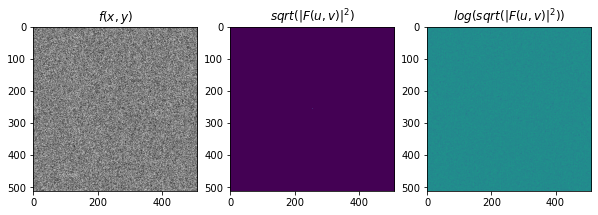

In [6]:
from numpy.fft import fft2,ifft2,fftshift,ifftshift
# fft2 -> Fourier transform
# ifft2 -> Inverse transform
# fftshift & ifftshift -> reorganize the "Fourier image" to make it more easily interpretable.

im = np.random.random((512,512))
f = fftshift(fft2(im))
amplitude = np.sqrt(np.real(f)**2+np.imag(f)**2)

plt.figure(figsize=[10,5])
plt.subplot(1,3,1)
plt.imshow(im,cmap = plt.cm.gray)
plt.title('$f(x,y)$')
plt.subplot(1,3,2)
plt.imshow(amplitude)
plt.title('$sqrt(|F(u,v)|^2)$')
plt.subplot(1,3,3)
plt.imshow(np.log(amplitude))# show log so as to see more than just the global maximum
plt.title('$log(sqrt(|F(u,v)|^2))$')
plt.show()

We could now, for instance, decide to add an horizontal frequency by creating peaks in the Fourier image on the horizontal axis. The further away from the center we put the peaks, the higher the frequency.

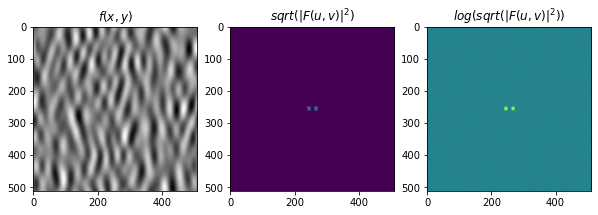

In [7]:
f2 = f.copy()
f2[250:262,262:272] *= 1000
f2[250:262,240:250] *= 1000
amplitude = np.sqrt(np.real(f2)**2+np.imag(f2)**2)
im2 = ifft2(ifftshift(f2)).real

plt.figure(figsize=[10,5])
plt.subplot(1,3,1)
plt.imshow(im2,cmap = plt.cm.gray)
plt.title('$f(x,y)$')
plt.subplot(1,3,2)
plt.imshow(amplitude)
plt.title('$sqrt(|F(u,v)|^2)$')
plt.subplot(1,3,3)
plt.imshow(np.log(amplitude))# show log so as to see more than just the global maximum
plt.title('$log(sqrt(|F(u,v)|^2))$')
plt.show()

Now we could also decide to mask the central region, which would remove the peaks that we just created and put all those values at zero. The image will once again look random:

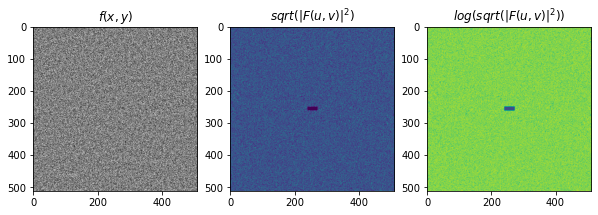

In [8]:
f3 = f2.copy()
f3[250:262,240:272] = 0
amplitude = np.sqrt(np.real(f3)**2+np.imag(f3)**2)
im3 = ifft2(ifftshift(f3)).real

plt.figure(figsize=[10,5])
plt.subplot(1,3,1)
plt.imshow(im3,cmap = plt.cm.gray)
plt.title('$f(x,y)$')
plt.subplot(1,3,2)
plt.imshow(amplitude)
plt.title('$sqrt(|F(u,v)|^2)$')
plt.subplot(1,3,3)
plt.imshow(np.log(amplitude, where=amplitude>0))
plt.title('$log(sqrt(|F(u,v)|^2))$')
plt.show()

Starting from those examples and the code below:

1. Use the Fourier transform to reduce the [dithering](https://en.wikipedia.org/wiki/Dither) of the *moire.png* image by building a low-pass filter.
1. Build a high-pass filter using Fourier transform and apply the filter to the "walking" image.

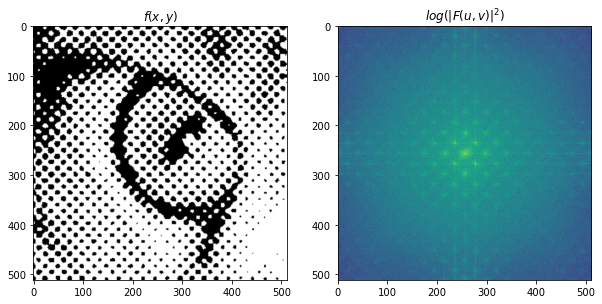

In [9]:
im = imread('moire1.png').astype('float')
f = fftshift(fft2(im)) # shift Fourier image so that the center corresponds to low frequencies

amplitude = np.sqrt(np.real(f)**2+np.imag(f)**2)

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.imshow(im,cmap = plt.cm.gray)
plt.title('$f(x,y)$')
plt.subplot(1,2,2)
plt.imshow(np.log(amplitude))# show log so as to see more than just the global maximum
plt.title('$log(|F(u,v)|^2)$')
plt.show()

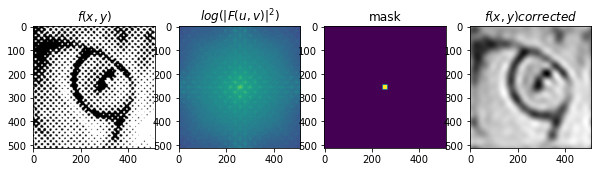

In [10]:
im = imread('moire1.png').astype('float')
f = fftshift(fft2(im)) # shift Fourier image so that the center corresponds to low frequencies

## -- Your code here -- ##
dsize = 10
mask = np.zeros((im.shape))
mask[mask.shape[0]//2-dsize:mask.shape[0]//2+dsize, mask.shape[1]//2-dsize:mask.shape[1]//2+dsize] = 1
masked_f = f*mask
corrected_im = ifft2(ifftshift(masked_f)).real


plt.figure(figsize=[10,5])
plt.subplot(1,4,1)
plt.imshow(im,cmap = plt.cm.gray)
plt.title('$f(x,y)$')
plt.subplot(1,4,2)
plt.imshow(np.log(amplitude))# show log so as to see more than just the global maximum
plt.title('$log(|F(u,v)|^2)$')
plt.subplot(1,4,3)
plt.imshow(mask)# show log so as to see more than just the global maximum
plt.title('mask')
plt.subplot(1,4,4)
plt.imshow(corrected_im.real,cmap = plt.cm.gray)
plt.title('$f(x,y) corrected$')
plt.show()

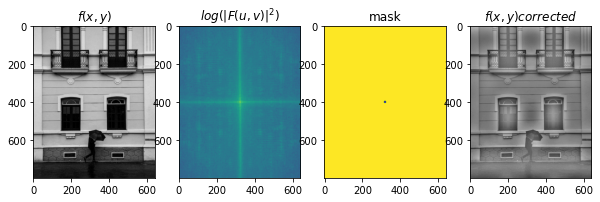

In [11]:
im = imread('walking.jpg').astype('float')
f = fftshift(fft2(im)) # shift Fourier image so that the center corresponds to low frequencies

amplitude = np.sqrt(np.real(f)**2+np.imag(f)**2)


dsize = 5
mask = np.ones((im.shape))
mask[mask.shape[0]//2-dsize:mask.shape[0]//2+dsize, mask.shape[1]//2-dsize:mask.shape[1]//2+dsize] = 0
masked_f = f*mask
corrected_im = ifft2(ifftshift(masked_f)).real


plt.figure(figsize=[10,5])
plt.subplot(1,4,1)
plt.imshow(im,cmap = plt.cm.gray)
plt.title('$f(x,y)$')
plt.subplot(1,4,2)
plt.imshow(np.log(amplitude))# show log so as to see more than just the global maximum
plt.title('$log(|F(u,v)|^2)$')
plt.subplot(1,4,3)
plt.imshow(mask)# show log so as to see more than just the global maximum
plt.title('mask')
plt.subplot(1,4,4)
plt.imshow(corrected_im.real,cmap = plt.cm.gray)
plt.title('$f(x,y) corrected$')
plt.show()

**Need more help? You can check the following videos:**

* [Understanding the 2D Fourier transform](https://www.youtube.com/watch?v=bsNQpeBZ7IY&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=18)
* [Filters in Fourier space](https://www.youtube.com/watch?v=8g-sE7wkKpU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=19)

## 4. Morphological operations

* For morphology functions, [see the skimage documentation](http://scikit-image.org/docs/dev/api/skimage.morphology.html?highlight=morphology#module-skimage.morphology)

Starting from the example below:

1. Using the "opening" operation with a disk structuring element of increasing size, determine how many circles of any given radius there are in the *circles.png* image.
1. Build a morphological filter that eliminates one size of circles.

Text(0.5, 1.0, 'dilation')

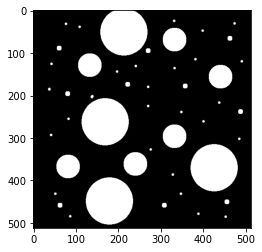

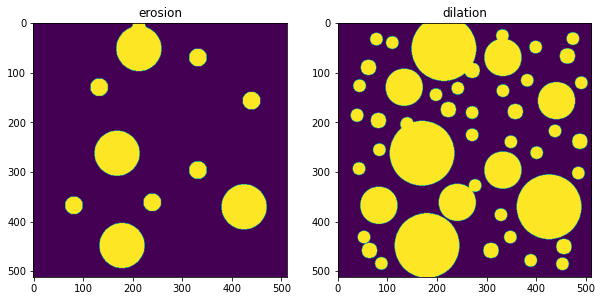

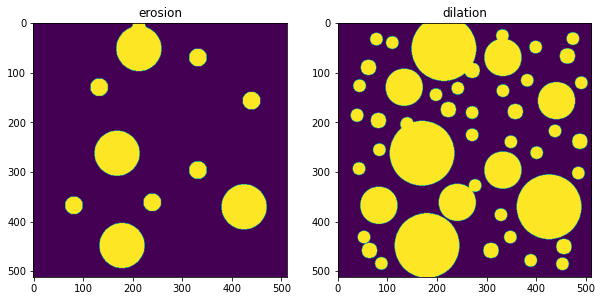

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.io import imread
from skimage.morphology import disk, erosion, dilation

im = imread('circles1.png')==0 #to be sure objects are = 1
plt.imshow(im,cmap=plt.cm.gray);


disksize = 10
# use the local maximum and local minimum for dilation and erosion
eroded_image = erosion(im,disk(disksize))
dilated_image = dilation(im,disk(disksize))

plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
plt.imshow(eroded_image)
plt.title('erosion')
plt.subplot(1,2,2)
plt.imshow(dilated_image)
plt.title('dilation')

# note that "erosion" and "dilation" are the same as the "local minimum" and "local maximum" :
from skimage.filters.rank import minimum,maximum
eroded_image = minimum(im.astype('uint8'), disk(disksize))
dilated_image = maximum(im.astype('uint8'), disk(disksize))

plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
plt.imshow(eroded_image)
plt.title('erosion')
plt.subplot(1,2,2)
plt.imshow(dilated_image)
plt.title('dilation')

**Need more help? You can check the following videos:**

* [Morphological operations](https://www.youtube.com/watch?v=b64M2dZaWPA&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=20)

## 5. Edge detection

Using the [convolve2d](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.convolve2d.html) function, develop the Sobel filter. 
The Sobel operator is given by
$$\mathbf{G} = \sqrt{ {\mathbf{G}_x}^2 + {\mathbf{G}_y}^2 }$$
where $G_x$ and $G_y$ are images respectively obtained by a convolution with the given kernels
$$\mathbf{g}_y = \begin{bmatrix} 
    -1 & -2 & -1  \\
    0 & 0 & 0 \\
    +1 & +2 & +1 
    \end{bmatrix}
    \quad
    \mbox{and}
    \quad   
    \mathbf{g}_x = \begin{bmatrix} 
    -1 & 0 & +1 \\
    -2 & 0 & +2 \\
    -1 & 0 & +1 
    \end{bmatrix}
    $$

**Apply the Sobel filter** to find the edges in the "road" image.

Compare with the results of the **Canny edge filter** with different "sigma" values (see [the skimage documentation](http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html))

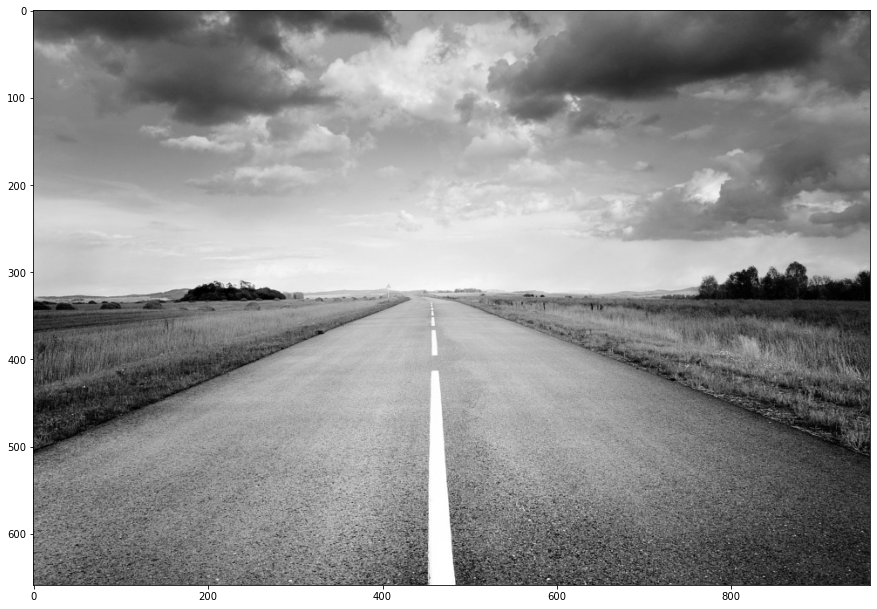

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


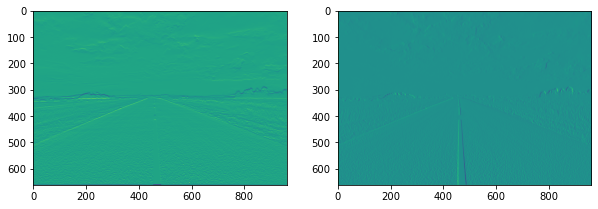

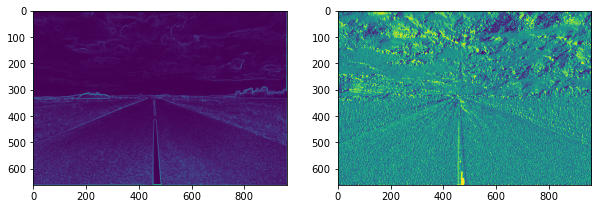

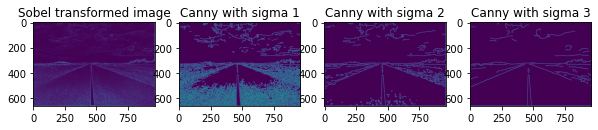

In [13]:
from skimage.data import camera
from skimage.io import imread
from scipy.signal import convolve2d
from skimage.feature import canny

im = imread('road.jpg', as_gray=True)

plt.figure(figsize=(15,15))
plt.imshow(im, cmap=plt.cm.gray)
plt.show()

## -- Your code here -- ##
# Make kernels
gx = np.array([[1,0,-1],[2, 0, -2],[1, 0, -1]])
gy = gx.T
print(gx,'\n',gy)

#Calculate convolution
GX = convolve2d(im, gx)
GY = convolve2d(im, gy)

plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
plt.imshow(GY)
plt.subplot(1,2,2)
plt.imshow(GX)
plt.show()

#Calculate Sobel score
G = np.sqrt((GX**2)+(GY**2))
D = np.arctan2(GX,GY)

plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
plt.imshow(G)
plt.subplot(1,2,2)
plt.imshow(D)
plt.show()


# Compare to Canny

plt.figure(figsize=[10,8])
plt.subplot(1,4,1)
plt.imshow(G)
plt.title('Sobel transformed image')
plt.subplot(1,4,2)
plt.imshow(canny(im, sigma=1))
plt.title('Canny with sigma 1')
plt.subplot(1,4,3)
plt.imshow(canny(im, sigma=2))
plt.title('Canny with sigma 2')
plt.subplot(1,4,4)
plt.imshow(canny(im, sigma=3))
plt.title('Canny with sigma 3')
plt.show()


Use the **[Hough transform](http://scikit-image.org/docs/dev/auto_examples/edges/plot_line_hough_transform.html)** to find the main straight lines in the road image, using the results from the Canny edge detector.

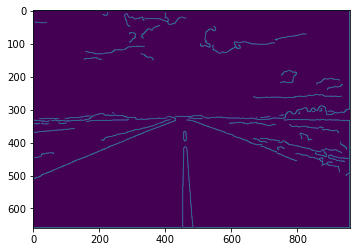

h-peaks: [958 949 638 620 180 168 158 151 135 129 128]
h-angles: [-90. -90.   0.   0.  68.   1.  89. -89. -70.  -4.   0.]
h-distances: [  -1. -657.    1.  958.  470.  463.  337. -317. -149.  435.  453.]


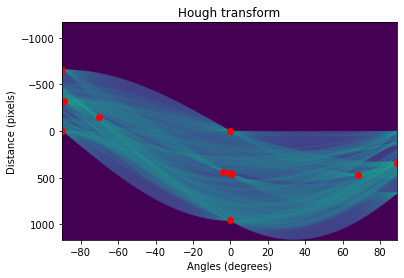

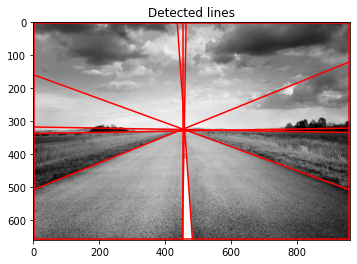

In [14]:

## -- Your code here -- ##
from skimage.transform import hough_line, hough_line_peaks

canny_edge_detector = canny(im, sigma=3)
plt.figure()
plt.imshow(canny_edge_detector)
plt.show()


h, theta, d = hough_line(canny_edge_detector)

plt.figure()
plt.imshow(np.log(h+1), extent=[np.rad2deg(theta[0]), np.rad2deg(theta[-1]), d[-1], d[0]], aspect='auto')
plt.title('Hough transform')
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance (pixels)')
hpeaks, hangles, hdists = hough_line_peaks(h, theta, d, threshold= 120)
plt.plot(np.rad2deg(hangles), hdists, 'ro')
print(f'h-peaks: {hpeaks}\nh-angles: {np.rad2deg(hangles)}\nh-distances: {hdists}')
plt.show()

plt.figure()
plt.imshow(im, cmap=plt.cm.gray)
for i in range(len(hpeaks)):
    x0 = 0
    x1 = im.shape[1]
    y0 = (hdists[i] - x0*np.cos(hangles[i]))/(np.sin(hangles[i])+0.0000001)
    y1 = (hdists[i] - x1*np.cos(hangles[i]))/(np.sin(hangles[i])+0.0000001)
    plt.plot((x0, x1), (y0,y1), '-r')

plt.xlim((0, im.shape[1]))
plt.ylim((im.shape[0], 0))
plt.title('Detected lines')
plt.show()

**Need more help? You can check the following videos:**

* [Edge detection with the Sobel filter](https://www.youtube.com/watch?v=QCjh8yyW-Wo&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=21)
* [Edge detection with the Canny transform](https://www.youtube.com/watch?v=yS5NnpWmuuI&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=22)
* [Line detection with the Hough Transform](https://www.youtube.com/watch?v=GD2xipfKQyY&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=23)

# Coding project - Picture enhancement

Write code that automatically enhances a photograph.

<img src="./etretat.jpg" width="250px" />
<img src="./ex_enhance.jpg" width="250px" />

"Enhance" may mean a lot of different things, and we encourage you to be creative in which enhancements you want to implement.

Some possibilities include (not an exhaustive list):

* Noise reduction
* Auto-level
* Gamma correction (with gamma provided by the user or automatically determined from the image histogram)
* Increase colour saturation
* ...

Parameters
focus_mk_size: 10 (Determines degree of blur)
focus_ek_size: 90 (Determines region size of blur)
threshold: 0.8 (Determines threshold for blur)


c:\Users\victo\anaconda3\lib\site-packages\skimage\_shared\utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


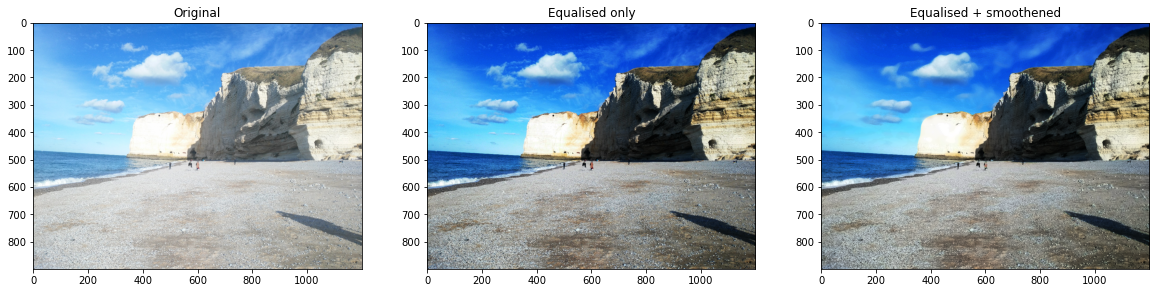

In [1]:
# -- Your code here -- #
from skimage.io import imread,imsave,imshow
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv, hsv2rgb
from skimage.morphology import disk
from skimage.filters.rank import entropy
from scipy.ndimage import median_filter
from skimage.exposure import equalize_hist
from skimage.util import img_as_ubyte


def selective_smoothen(im, imtype, m_k_size=5, e_k_size=50, threshold = 0.5):
    """
    Replaces image pixels that are in a region of low local entropy with pixel value of median filtered image.

    Args:
    im (array): 1 channel image in array form
    imtype (str): h = hue channel, s = saturation channel, v = value channel. Used for plot style
    m_k_size (int): Radius of disk for calculating median image
    e_k_size (int): Radius of disk for calculating local entropy
    threshold (float): Used to influence entropy thresholding
    """
    # Create dictionary for cmap types
    cmap_dict = {'h':'hsv', 's':'gray', 'v':'gray'} 
    
    # Calculate entropy of image and set threshold
    im_c = img_as_ubyte(im, force_copy=True)
    im_entropy_map = entropy(im_c, np.ones((e_k_size, e_k_size)))
    im_entropy_max = im_entropy_map.max()
    entropy_threshold = round(im_entropy_max-(threshold*np.std(im_entropy_map)), 3)

    # Calculate median filtered image
    # Not optimised because we don't need the whole median filtered image
    im_median = median_filter(im_c, footprint=disk(m_k_size))
    
    # Range over pixels, if in low entropy region replace pixel with median filtered image one
    for y in range(im_c.shape[0]):
        for x in range(im_c.shape[1]):
            if im_entropy_map[y, x] < entropy_threshold:
                im_c[y, x] = im_median[y, x]

    # Plot informative plots
    #plt.figure(figsize=(15,10))
    #plt.subplot(2,2,1)
    #plt.imshow(im, cmap=cmap_dict[imtype])
    #plt.title('ORIGINAL')
    #plt.subplot(2,2,2)
    #plt.imshow(im_entropy_map)
    #plt.title(f'Entropy_map with threshold {entropy_threshold}')
    #plt.colorbar()
    #plt.subplot(2,2,3)
    #plt.imshow(im_median, cmap=cmap_dict[imtype])
    #plt.title(f'MEDIAN with disksize {m_k_size}')
    #plt.subplot(2,2,4)
    #plt.imshow(im_c!=im, cmap=cmap_dict[imtype])
    #plt.title('Adapted pixels')
    #plt.show()

    return im_c


def victors_image_beautify(im, focus_mk_size=9, focus_ek_size=90, threshold=0.5):
    """
    Adapts 3 channel image by performing an equalization and a local median blur

    Args:
    im (array): 1 channel image in array form
    focus_mk_size (int): Radius of disk for calculating median image (Determines degree of blur)
    focus_ek_size (int): Radius of disk for calculating local entropy (Determines size of blurred region)
    threshold (float): Used to influence entropy thresholding
    """
    print(f'Parameters\nfocus_mk_size: {focus_mk_size} (Determines degree of blur)\nfocus_ek_size: {focus_ek_size} (Determines region size of blur)\nthreshold: {threshold} (Determines threshold for blur)')
    im_c = im.copy()

    # Equalise histogram
    im_equalised = equalize_hist(im_c)
    #Convert to hsv channels
    im_equalised_hsv = rgb2hsv(im_equalised)
    
    im_h = im_equalised_hsv[:,:,0]
    im_s = im_equalised_hsv[:,:,1]
    im_v = im_equalised_hsv[:,:,2]

    # Smoothen image by median filtering regions with low complexity (=low entropy)
    # Totally not optimised because running through the image three times
    im_smoothened_h = selective_smoothen(im_h, 'h', focus_mk_size, focus_ek_size)
    im_smoothened_s = selective_smoothen(im_s, 's', focus_mk_size, focus_ek_size)
    im_smoothened_v = selective_smoothen(im_v, 'v', focus_mk_size, focus_ek_size, threshold*4)

    # Reasemble color image
    im_equalised_smoothed = hsv2rgb(np.stack((im_smoothened_h, im_smoothened_s, im_smoothened_v), axis=2))

    # Show intermediate and end result
    plt.figure(figsize=(20,20))
    plt.subplot(1,3,1)
    plt.imshow(im_c)
    plt.title('Original')
    plt.subplot(1,3,2)
    plt.imshow(im_equalised)
    plt.title('Equalised only')
    plt.subplot(1,3,3)
    plt.imshow(im_equalised_smoothed)
    plt.title('Equalised + smoothened')
    plt.show()



g = imread('etretat.jpg')
victors_image_beautify(g, focus_mk_size=10, focus_ek_size=90, threshold=0.8)